## Topic Modelling using Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) in sklearn

### **There also exists implementation using the Gensim library. Checkout the same [here](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)  ,   [here](https://nlpforhackers.io/topic-modeling/) and [here](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/) and also in [this](https://github.com/susanli2016/NLP-with-Python/blob/master/LDA_news_headlines.ipynb) notebook.**

## [Please star/upvote in case u like it. ]

#### IMPORTING MODULES

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#### LOADING THE DATASET

In [2]:
df=pd.read_csv(r'../input/abcnews-date-text.csv')

In [3]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


We will drop the **'publish_date'** column as it is useless for our discussion.

In [4]:
# drop the publish date.
df.drop(['publish_date'],axis=1,inplace=True)

In [5]:
df.head(10)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
5,ambitious olsson wins triple jump
6,antic delighted with record breaking barca
7,aussie qualifier stosur wastes four memphis match
8,aust addresses un security council over iraq
9,australia is locked into war timetable opp


#### DATA CLEANING & PRE-PROCESSING

Here I have done the data pre-processing. I have used the lemmatizer and can also use the stemmer. Also the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.

In [6]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text
  
  

In [7]:
# time taking
df['headline_cleaned_text']=df['headline_text'].apply(clean_text)

In [8]:
df.head()

,headline_text,headline_cleaned_text
0,aba decides against community broadcasting lic...,decides community broadcasting licence
1,act fire witnesses must be aware of defamation,fire witness must aware defamation
2,a g calls for infrastructure protection summit,call infrastructure protection summit
3,air nz staff in aust strike for pay rise,staff aust strike rise
4,air nz strike to affect australian travellers,strike affect australian traveller


Can see the difference after removal of stopwords and some shorter words. aslo the words have been lemmatized as in **'calls'--->'call'.**

Now drop the unpre-processed column.

In [9]:
df.drop(['headline_text'],axis=1,inplace=True)

In [10]:
df.head()

,headline_cleaned_text
0,decides community broadcasting licence
1,fire witness must aware defamation
2,call infrastructure protection summit
3,staff aust strike rise
4,strike affect australian traveller


We can also see any particular news headline.

In [11]:
df['headline_cleaned_text'][0]

'decides community broadcasting licence'

#### EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

In DTM the values are the TFidf values.

Also I have specified some parameters of the Tfidf vectorizer.

Some important points:-

**1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.**

**2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.**

**3) Default values for min_df & max_df worked well.**

**4) Can try different values for ngram_range.**

In [12]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [13]:
vect_text=vect.fit_transform(df['headline_cleaned_text'])

#### We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value; more common is the word in the news headlines.

In [14]:
print(vect_text.shape)
print(vect_text)

(1244184, 1000)
  (0, 179)	0.6212825307738553
  (0, 507)	0.7835866365343614
  (1, 322)	0.4409794528678519
  (1, 982)	0.6342927179400741
  (1, 575)	0.6349880865942004
  (2, 123)	0.4267593659740731
  (2, 680)	0.6238273694257671
  (2, 849)	0.6547639702280009
  (3, 825)	0.5296907773564236
  (3, 55)	0.5231144394497186
  (3, 841)	0.4902042737088293
  (3, 742)	0.4532976215030844
  (4, 841)	0.7722467808073474
  (4, 57)	0.6353226814247142
  (5, 977)	1.0
  (6, 708)	1.0
  (7, 54)	0.46228059888207784
  (7, 960)	0.5360813504606461
  (7, 345)	0.479992998090549
  (7, 542)	0.5181893045688648
  (8, 55)	0.46950289259377703
  (8, 12)	0.5211813266275572
  (8, 774)	0.44801462527056085
  (8, 201)	0.3500874649157694
  (8, 452)	0.4297193515229966
  :	:
  (1244176, 62)	0.6233172754536243
  (1244176, 523)	0.7819690365488077
  (1244177, 659)	0.7758784765009443
  (1244177, 994)	0.6308823897546781
  (1244178, 373)	0.5060001090511829
  (1244178, 60)	0.6158398551561406
  (1244178, 174)	0.6039082400840834
  (1244179,

In [15]:
idf=vect.idf_

In [16]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['police'])
print(dd['forecast'])  # police is most common and forecast is least common among the news headlines.

police walk
4.443299144410428
7.91597505058549


We can therefore see that on the basis of the **idf value** , **'police'** is the **most frequent** word while **'forecast'** is **least frequently** occuring among the news.

### TOPIC MODELLING

## Latent Semantic Analysis (LSA)

The first approach that I have used is the LSA. **LSA is basically singular value decomposition.**

**SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.**

**Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).**

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. **We can then use these vectors to find similar words and similar documents using the cosine similarity method.**

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract.
The model is then fit and transformed on the result given by vectorizer. 

**Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.**

In [17]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [18]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 1.61005039e-04  1.03248144e-02  2.13804318e-02 ... -2.52938896e-03
   3.09350860e-03 -2.61027821e-03]
 [ 7.70639640e-04  5.11219967e-02  7.27685688e-02 ...  1.50359764e-01
  -8.39882200e-02  1.12321653e-02]
 [ 5.59356605e-04  3.71416029e-02  9.40733284e-02 ...  2.99188515e-01
  -4.68321533e-02 -1.68995282e-02]
 ...
 [ 1.52122379e-04  1.13330639e-02  2.37154481e-02 ...  8.80449372e-04
   7.28252141e-03 -5.07468407e-03]
 [ 3.36506734e-04  2.80773192e-02  2.46272986e-02 ...  2.32182617e-03
   3.01118803e-02 -8.96458497e-03]
 [ 3.56953588e-04  2.00345981e-02  4.13818855e-02 ...  2.67615258e-03
   1.41022909e-02 -4.39095395e-03]]
(1244184, 10)


In [19]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  0.016100503869338433
Topic  1  :  1.032481443503125
Topic  2  :  2.138043176911785
Topic  3  :  -0.7620740415658358
Topic  4  :  -1.0926170299889055
Topic  5  :  -0.6881262142931033
Topic  6  :  0.0488378433130276
Topic  7  :  -0.2529388963594684
Topic  8  :  0.309350859807212
Topic  9  :  -0.2610278207444215


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [20]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 2.77432475e-05  6.35912934e-05  6.82052976e-05 ...  1.27805339e-04
   3.74182406e-05  5.22850655e-05]
 [ 1.05886216e-03  1.30603435e-03  1.54243773e-03 ...  2.74429068e-03
   2.28582531e-03  2.62491583e-03]
 [ 3.25748651e-03  4.05123655e-03  4.89137619e-03 ...  8.60323665e-03
   4.45700128e-03  4.84595536e-03]
 ...
 [ 9.70043882e-05 -9.85910225e-05  9.45915844e-05 ... -1.87287288e-04
   1.36983711e-03 -1.60473169e-04]
 [ 2.87156904e-03  2.93943167e-03  4.05615743e-03 ...  2.20548296e-03
   3.50032803e-05  5.64644592e-04]
 [-1.85271138e-04 -1.23516490e-04 -2.45466987e-05 ... -1.32027552e-04
   6.86795900e-04 -1.20255015e-04]]


#### Now e can get a list of the important words for each of the 10 topics as shown. For simplicity here I have shown 10 words for each topic.

In [21]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
interview extended michael john david smith james police andrew mark 

Topic 1: 
police death woman fire say crash court call probe murder 

Topic 2: 
say australia plan council call back govt fire court australian 

Topic 3: 
say police minister need trump must expert wont labor needed 

Topic 4: 
australia say police south world china coronavirus india test first 

Topic 5: 
court woman face murder charged fire charge death accused crash 

Topic 6: 
fire house plan home crew australia govt sydney damage blaze 

Topic 7: 
call fire say medium house home death australian inquiry spark 

Topic 8: 
australian woman crash year open dy charged back killed world 

Topic 9: 
back court police australian fight hit fire claim year track 



## Latent Dirichlet Allocation (LDA)  

LDA is the most popular technique.**The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.**

**To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.**

To get an inituitive explanation of LDA checkout these blogs: [this](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)  ,  [this](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/)  ,[this](https://en.wikipedia.org/wiki/Topic_model)  ,  [this kernel on Kaggle](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)  ,  [this](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/) .

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [23]:
lda_top=lda_model.fit_transform(vect_text)

In [24]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(1244184, 10)
[[0.0415823  0.0415823  0.0415823  ... 0.0415823  0.62575927 0.0415823 ]
 [0.19959635 0.03690472 0.03689683 ... 0.03689683 0.03689683 0.03689683]
 [0.03696378 0.03696378 0.19471019 ... 0.03696378 0.50957953 0.03696378]
 ...
 [0.04142418 0.33877314 0.04142418 ... 0.04142418 0.04142418 0.04142418]
 [0.04151834 0.04151834 0.04151834 ... 0.04151834 0.36011814 0.04151834]
 [0.20265722 0.03334462 0.03334462 ... 0.03334462 0.03334462 0.03334462]]


In [25]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0


#### Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

In [26]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  4.158230366964279 %
Topic  1 :  4.158230366976006 %
Topic  2 :  4.158230366969732 %
Topic  3 :  4.1582303669724 %
Topic  4 :  4.1582303669721075 %
Topic  5 :  4.1582303669718925 %
Topic  6 :  4.158230366967037 %
Topic  7 :  4.158230366968324 %
Topic  8 :  62.5759266972693 %
Topic  9 :  4.158230366968913 %


#### As we can see Topic 7 & 8 are dominantly present in document 0.

 

In [27]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[1.00001363e-01 1.00000749e-01 1.01861138e+03 ... 1.00010968e-01
  1.00004927e-01 1.00006924e-01]
 [1.00002223e-01 1.00001176e-01 1.00000832e-01 ... 1.00008798e-01
  1.00001420e-01 1.00005772e-01]
 [1.00000381e-01 1.00000777e-01 1.00001103e-01 ... 1.00006172e-01
  1.00001393e-01 1.00004973e-01]
 ...
 [1.00001183e-01 1.00001474e-01 1.00001614e-01 ... 1.00004791e-01
  1.00001709e-01 1.00004789e-01]
 [1.00000184e-01 5.31736977e+02 1.00001697e-01 ... 2.87310871e+03
  2.07560446e+02 1.00005909e-01]
 [1.00000380e-01 1.00001909e-01 1.00001589e-01 ... 1.00006382e-01
  1.00002813e-01 1.00002584e-01]]
(10, 1000)


#### Most important words for a topic. (say 10 this time.)

In [28]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
coronavirus covid case fire brisbane could house crash hotel street 

Topic 1: 
police victoria restriction open bushfire island premier water finance storm 

Topic 2: 
australia queensland call health indigenous north farmer student labor high 

Topic 3: 
say home change coast canberra worker former gold tasmanian three 

Topic 4: 
sydney woman government border first live help speaks regional climate 

Topic 5: 
election record south family tasmania school death found dead president 

Topic 6: 
donald court child adelaide victorian show national perth federal report 

Topic 7: 
australian trump year china news minister back trial charged andrew 

Topic 8: 
melbourne people community time final royal rise story commission game 

Topic 9: 
vaccine world state life market morrison business attack scott test 



#### To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [29]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

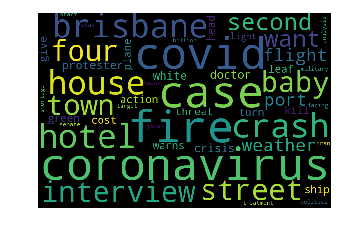

In [30]:
# topic 0
draw_word_cloud(0)

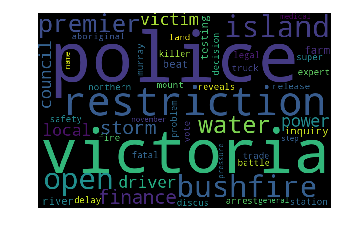

In [31]:
# topic 1
draw_word_cloud(1)  # ...

## THE END !!!

## [Please star/upvote in case u liked it. ]